## Clifford Fourier Transform for color images

This code corresponds the implementation described in:
"Color object recognition based on a clifford fourier transform". 
Jose Mennesson, Christophe Saint-Jean, and Laurent Mascarilla. 
In book "Guide to Geometric Algebra in Practice". Springer, 2011.

In [2]:
from sympy.galgebra import *


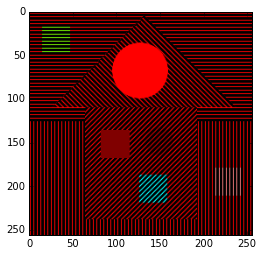

(256, 256, 3)


In [11]:
import numpy as np
from scipy import misc

import matplotlib.pyplot as plt
%matplotlib inline

# just to open image from url
import requests
from StringIO import StringIO

url = 'https://hal.archives-ouvertes.fr/hal-00332912v2/file/Fhouse_color.png'
#url = 'http://www.cs.cmu.edu/~chuck/lennapg/lena_std.tif'
image = misc.imread(StringIO(requests.get(url).content))[:,:,0:3]/255.
plt.imshow(image)
plt.show()
print image.shape


In [12]:
def cfft2(image, c, reconstruction = False):
    h,l,_ = image.shape
    image = np.dstack((image, np.zeros((h,l))))
    c = c/np.linalg.norm(c)
    mu = np.ones(3)/np.sqrt(3)
    if np.allclose(np.cross(c, mu), np.zeros(3)):
        mu = np.array([1.,0,0])
    v = np.cross(c,np.cross(mu,c))
    w = np.cross(v,c)
    c, e4, v , w = np.append(c,0), np.array([0,0,0,1.]), np.append(v,0), np.append(w,0)
    # Computation of two FFT2s on the two projected Image
    output = {}
    print c, e4, v , w
    output['parallel'] = np.fft.fft2(np.dot(image, c) + 1j* np.dot(image, e4))
    output['orthogonal'] = np.fft.fft2(np.dot(image,v) + 1j *np.dot(image, w))
    if reconstruction is True:
        output['reconstruction'] = np.outer(output['parallel'].real,c)
        output['reconstruction'] += np.outer(output['parallel'].imag, e4)
        output['reconstruction'] += np.outer(output['orthogonal'].real, v)
        output['reconstruction'] += np.outer(output['orthogonal'].imag, w)
        output['reconstruction'] = np.reshape(output['reconstruction'],(h,l,4))
    return output

[ 1.  0.  0.  0.] [ 0.  0.  0.  1.] [-0.          0.57735027  0.57735027  0.        ] [ 0.          0.57735027 -0.57735027  0.        ]


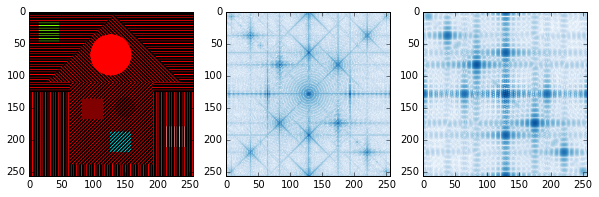

In [13]:
from IPython.html.widgets import interact
from IPython.html import widgets
r_slider = widgets.IntSliderWidget(min=0, max=255, step=1, value=255)
g_slider = widgets.IntSliderWidget(min=0, max=255, step=1, value=0)
b_slider = widgets.IntSliderWidget(min=0, max=255, step=1, value=0)
    
def f(r,g,b):
    R = cfft2(image,np.array([r,g,b]))
    fig, ax = plt.subplots(1, 3, figsize=(10,5)) 
    ax[0].imshow(image)           
    ax[1].imshow(np.log(1+np.abs(np.fft.fftshift(R['parallel']))), plt.cm.Blues)
    ax[2].imshow(np.log(1+np.abs(np.fft.fftshift(R['orthogonal']))), plt.cm.Blues)
              
interact(f, r=r_slider, g=g_slider, b=b_slider)

In [ ]:
radius_slider = widgets.IntSliderWidget(min=0, max=255, step=1, value=11)
R = cfft2(image,np.array([r,g,b]))
def low_pass_filter(r):
    
    